# Week 3 Exercises

c:\Users\champ\OneDrive\Documents\DSC530 Data Exploration\ThinkStats2\code


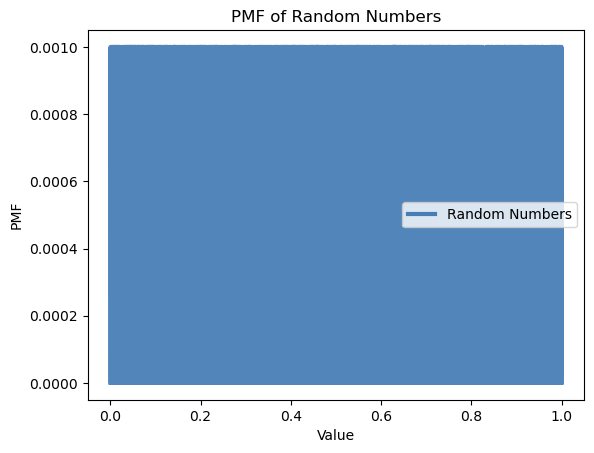

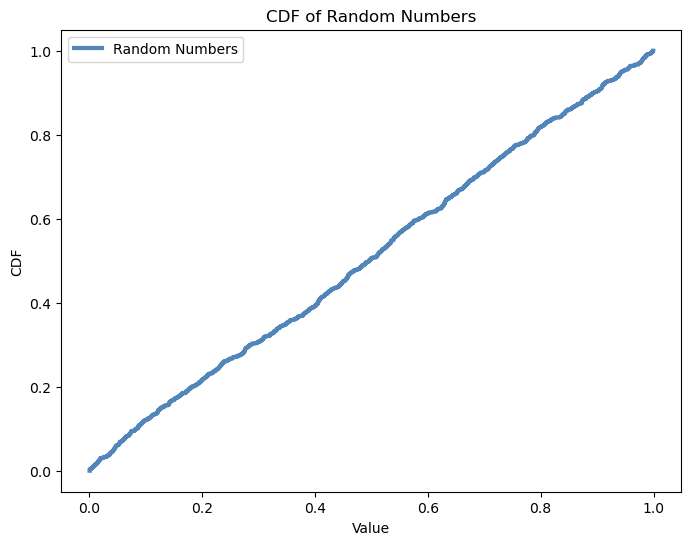

The distribution on these random numbers is not uniform, as the CDF should be perfectly linear, however when lookinga at it, you can clearly see that there are kinks and curves. It is not a straight laine, thus not perfectly random at least in this sample size.



The PMF should be approximately uniform, with all values having roughly the same probability.


c:\Users\champ\OneDrive\Documents\DSC530 Data Exploration\ThinkStats2\code\nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
c:\Users\champ\OneDrive\Documents\DSC530 Data Exploration\ThinkStats2\code\nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

My birth weight: 7.4 pounds
Percentile rank: 50.93%
Actual Mean: 1.02, Variance: 1.41
Biased Mean: 2.40, Variance: 1.17


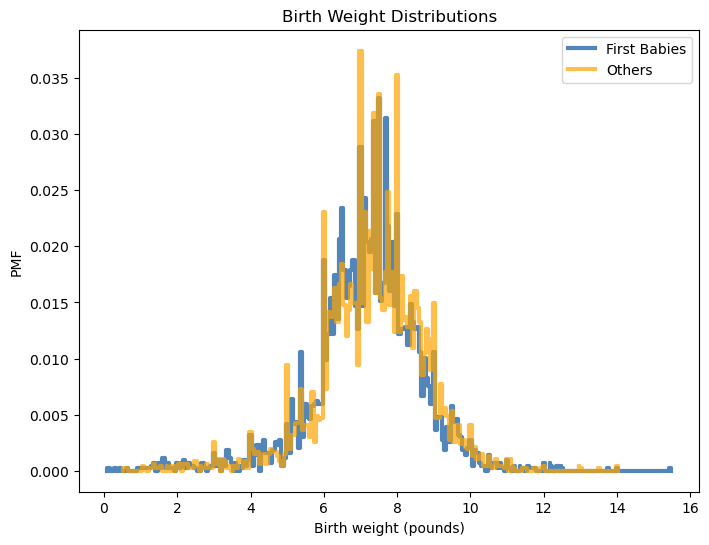

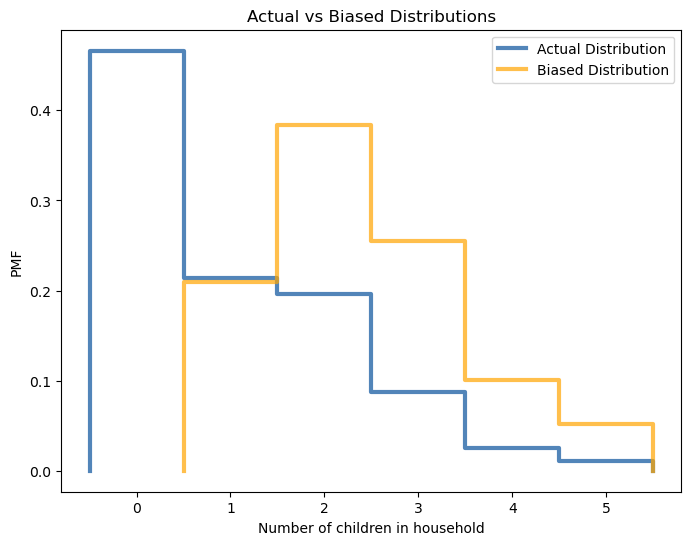

<Figure size 800x600 with 0 Axes>

In [7]:
from __future__ import print_function

import numpy as np
import sys

import nsfg
import thinkstats2
import thinkplot
import os

# Set the directory
os.chdir(r"C:\Users\champ\OneDrive\Documents\DSC530 Data Exploration\ThinkStats2\code")

# Verify the current working directory
print(os.getcwd())

def PmfMean(pmf):
    """Computes the mean of a PMF.

    Args:
        pmf: Pmf object

    Returns:
        float mean
    """
    mean = sum(p * x for x, p in pmf.Items())
    return mean

def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.

    Args:
        pmf: Pmf object
        mu: the point around which the variance is computed;
            if omitted, computes the mean

    Returns:
        float variance
    """
    if mu is None:
        mu = PmfMean(pmf)

    var = sum(p * (x - mu) ** 2 for x, p in pmf.Items())
    return var

def PercentileRank(cdf, value):
    """Computes the percentile rank for a value.

    Args:
        cdf: Cdf object
        value: value to compute the rank for

    Returns:
        Percentile rank (float)
    """
    return cdf.Prob(value)

def main():
    # Generate 1000 random numbers between 0 and 1
    random_numbers = np.random.random(1000)

    # Compute the PMF
    random_pmf = thinkstats2.Pmf(random_numbers, label='Random Numbers')

    # Compute the CDF
    random_cdf = thinkstats2.Cdf(random_numbers, label='Random Numbers')

    # Plot the PMF
    thinkplot.PrePlot(1)
    thinkplot.Pmf(random_pmf)
    thinkplot.Show(xlabel='Value', ylabel='PMF', title='PMF of Random Numbers')

    # Plot the CDF
    thinkplot.PrePlot(1)
    thinkplot.Cdf(random_cdf)
    thinkplot.Show(xlabel='Value', ylabel='CDF', title='CDF of Random Numbers')

    print('The distribution on these random numbers is not uniform, as the CDF should be perfectly linear, however when lookinga at it, you can clearly see that there are kinks and curves. It is not a straight laine, thus not perfectly random at least in this sample size.\n\n\n')

    # Verify if the distribution is uniform by looking at the PMF
    print("The PMF should be approximately uniform, with all values having roughly the same probability.")

    # Load the NSFG data
    live = nsfg.ReadFemPreg()
    live = live[live.outcome == 1]  # Filter for live births

    # Separate into first babies and others
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    # Extract birth weights
    first_weights = firsts.totalwgt_lb.dropna()
    other_weights = others.totalwgt_lb.dropna()

    # Compute PMFs and CDFs
    first_pmf = thinkstats2.Pmf(first_weights, label='First Babies')
    other_pmf = thinkstats2.Pmf(other_weights, label='Others')
    first_cdf = thinkstats2.Cdf(first_weights, label='First Babies')
    other_cdf = thinkstats2.Cdf(other_weights, label='Others')

    # My birth weight
    my_weight = 7.4
    percentile_rank = PercentileRank(other_cdf, my_weight)

    print(f"My birth weight: {my_weight} pounds")
    print(f"Percentile rank: {percentile_rank * 100:.2f}%")

    # Load the NSFG respondent data
    df = nsfg.ReadFemResp()

    # Extract the `numkdhh` column
    numkdhh = df['numkdhh'].dropna()

    # Actual distribution (respondents' perspective)
    actual_pmf = thinkstats2.Pmf(numkdhh, label='Actual Distribution')

    # Biased distribution (children's perspective)
    biased_values = []
    for value in numkdhh:
        biased_values.extend([value] * int(value))
    biased_pmf = thinkstats2.Pmf(biased_values, label='Biased Distribution')

    # Compute means and variances using PmfMean and PmfVar
    actual_mean = PmfMean(actual_pmf)
    actual_var = PmfVar(actual_pmf, mu=actual_mean)
    biased_mean = PmfMean(biased_pmf)
    biased_var = PmfVar(biased_pmf, mu=biased_mean)

    print(f"Actual Mean: {actual_mean:.2f}, Variance: {actual_var:.2f}")
    print(f"Biased Mean: {biased_mean:.2f}, Variance: {biased_var:.2f}")

    # Plot the distributions for birth weights
    thinkplot.PrePlot(2)
    thinkplot.Pmf(first_pmf, label='First Babies')
    thinkplot.Pmf(other_pmf, label='Others', color='orange')
    thinkplot.Show(xlabel='Birth weight (pounds)', ylabel='PMF',
                   title='Birth Weight Distributions')

    # Plot the actual and biased distributions
    thinkplot.PrePlot(2)
    thinkplot.Pmf(actual_pmf, label='Actual Distribution')
    thinkplot.Pmf(biased_pmf, label='Biased Distribution', color='orange')
    thinkplot.Show(xlabel='Number of children in household', ylabel='PMF',
                   title='Actual vs Biased Distributions')

if __name__ == '__main__':
    main()
